# Part A – Data Exploration (Pandas & Numpy)

## 1. Load the dataset
- Use Pandas to load the CSV.
- Display the first 10 rows to get a quick look.
- Print the column names and their data types.
- Use .describe() to view basic statistics (mean, min, max, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic-Dataset.csv')

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Handle Missing Values
- Check for missing values with .isnull().sum().
- Replace missing Age values with the mean age (using Numpy).
- Fill missing Embarked values with the most common port.


In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
mean_age = np.nanmean(df['Age'])
mean_age

np.float64(29.69911764705882)

In [6]:
df['Age'] = np.where(np.isnan(df['Age']), mean_age, df['Age'])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [7]:
most_common_port = df['Embarked'].mode()[0]

df['Embarked'] = df['Embarked'].fillna(most_common_port)
df.head(62) # row number 62 Embarked column fill with 'S'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C


## 3. Basic Questions
- How many passengers were onboard?
- What is the average Age?
- What is the average Fare?
- How many males and females were there?

In [8]:

print(f"Total passengers onboard: {len(df)}")

print(f"Average age: {df['Age'].mean():.2f} years")

print(f"Average fare: ${df['Fare'].mean():.2f}")

gender_counts = df['Sex'].value_counts()
print(f"Males: {gender_counts['male']}")
print(f"Females: {gender_counts['female']}")

Total passengers onboard: 891
Average age: 29.70 years
Average fare: $32.20
Males: 577
Females: 314


# Part B – Data Analysis (Pandas)

## 4. Survival Analysis
- How many survived vs. did not survive?
- What percentage of passengers survived?

In [9]:
survival_counts = df['Survived'].value_counts()
survived = survival_counts.get(1, 0)  # 1 represents survived
not_survived = survival_counts.get(0, 0)  # 0 represents did not survive

print(f"Passengers survived: {survived}")
print(f"Passengers did not survive: {not_survived}")

print(f"Survival percentage: {(survived / len(df)) * 100:.2f}%")

Passengers survived: 342
Passengers did not survive: 549
Survival percentage: 38.38%


## 5. Survival by Class (Pclass)
- Find survival rates for 1st, 2nd, and 3rd class.
- Which class had the highest chance of survival?

In [10]:

survival_by_class = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']).reset_index()
survival_by_class.columns = ['Class', 'Total_Passengers', 'Survived', 'Survival_Rate']

print("Survival by Passenger Class:")
print("=" * 50)
for i, row in survival_by_class.iterrows():
    print(f"Class {int(row['Class'])}:")
    print(f"  Total passengers: {row['Total_Passengers']}")
    print(f"  Survived: {row['Survived']}")
    print(f"  Survival rate: {row['Survival_Rate']*100:.1f}%")
    print("-" * 30)


highest_survival_class = survival_by_class.loc[survival_by_class['Survival_Rate'].idxmax()]
print(f"\nClass with highest survival chance: Class {int(highest_survival_class['Class'])}")
print(f"Survival rate: {highest_survival_class['Survival_Rate']*100:.1f}%")


Survival by Passenger Class:
Class 1:
  Total passengers: 216.0
  Survived: 136.0
  Survival rate: 63.0%
------------------------------
Class 2:
  Total passengers: 184.0
  Survived: 87.0
  Survival rate: 47.3%
------------------------------
Class 3:
  Total passengers: 491.0
  Survived: 119.0
  Survival rate: 24.2%
------------------------------

Class with highest survival chance: Class 1
Survival rate: 63.0%


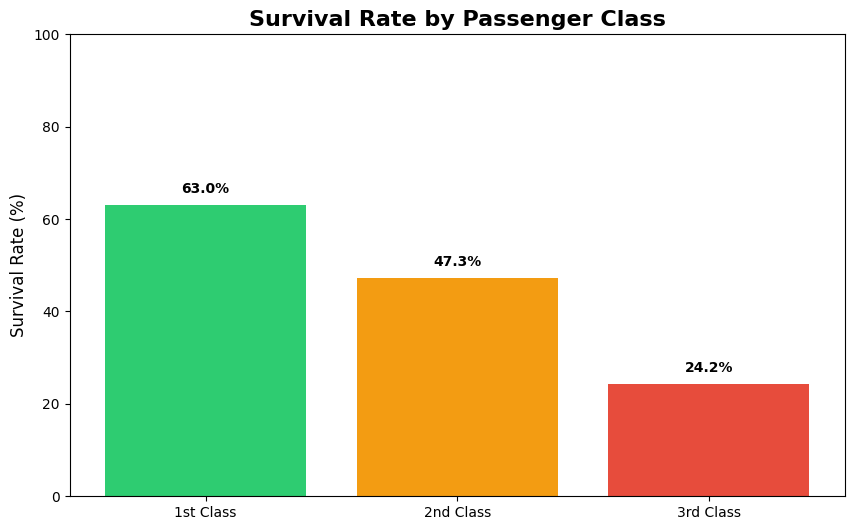

In [11]:
#Survival by Class
plt.figure(figsize=(10, 6))
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
bars = plt.bar(['1st Class', '2nd Class', '3rd Class'], class_survival.values, 
               color=['#2ecc71', '#f39c12', '#e74c3c'])
plt.title('Survival Rate by Passenger Class', fontsize=16, fontweight='bold')
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)
for bar, value in zip(bars, class_survival.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.savefig('class_survival.png', dpi=300, bbox_inches='tight')

plt.show()

## 6. Survival by Age Group
1. Divide passengers into age groups:
- 0–12 = Child
- 13–19 = Teen
- 20–40 = Adult
- 41+ = Senior

2. Calculate survival rate for each group.


In [12]:

def categorize_age(age):
    if age <= 12:
        return 'Child (0-12)'
    elif age <= 19:
        return 'Teen (13-19)'
    elif age <= 40:
        return 'Adult (20-40)'
    else:
        return 'Senior (41+)'

df['Age_Group'] = df['Age'].apply(categorize_age)

age_group_stats = df.groupby('Age_Group')['Survived'].agg([
    ('Total_Passengers', 'count'),
    ('Survived', 'sum'),
    ('Survival_Rate', 'mean')
]).reset_index()


age_group_order = ['Child (0-12)', 'Teen (13-19)', 'Adult (20-40)', 'Senior (41+)']
age_group_stats['Age_Group'] = pd.Categorical(age_group_stats['Age_Group'], categories=age_group_order, ordered=True)
age_group_stats = age_group_stats.sort_values('Age_Group')

print("Survival by Age Group:")
print("=" * 50)
for i, row in age_group_stats.iterrows():
    print(f"{row['Age_Group']}:")
    print(f"  Total passengers: {row['Total_Passengers']}")
    print(f"  Survived: {row['Survived']}")
    print(f"  Survival rate: {row['Survival_Rate']*100:.1f}%")
    print("-" * 30)

Survival by Age Group:
Child (0-12):
  Total passengers: 69
  Survived: 40
  Survival rate: 58.0%
------------------------------
Teen (13-19):
  Total passengers: 95
  Survived: 39
  Survival rate: 41.1%
------------------------------
Adult (20-40):
  Total passengers: 577
  Survived: 208
  Survival rate: 36.0%
------------------------------
Senior (41+):
  Total passengers: 150
  Survived: 55
  Survival rate: 36.7%
------------------------------


# Part C – Visualization (Matplotlib & Seaborn)
## 7 Matplotlib
- Bar chart: Number of survivors (0 vs 1).
- Histogram: Distribution of passenger ages (bins = 20).
- Pie chart: Gender distribution.


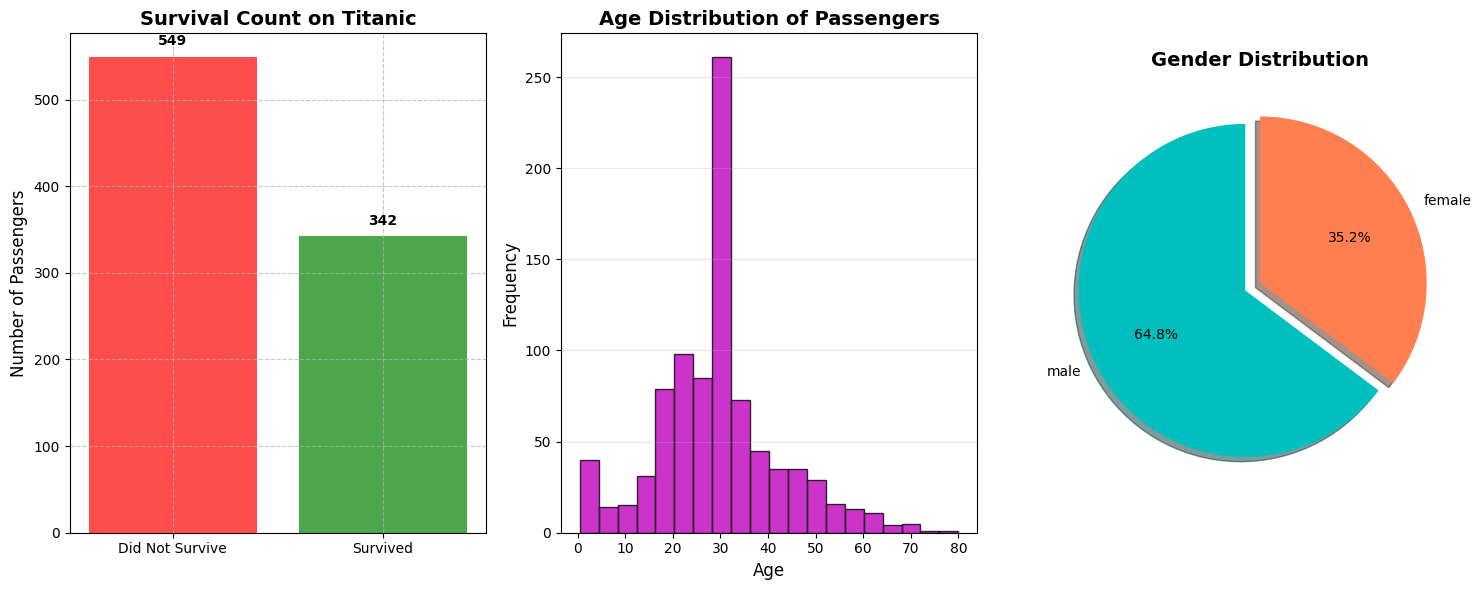

In [13]:

plt.figure(figsize=(15, 6))

# 1. Bar chart: Number of survivors (0 vs 1)
plt.subplot(1, 3, 1)
survival_counts = df['Survived'].value_counts().sort_index()
survival_labels = ['Did Not Survive', 'Survived']

bars = plt.bar(survival_labels, survival_counts.values, color=['r', 'g'], alpha=0.7)
plt.title('Survival Count on Titanic', fontsize=14, fontweight='bold')
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar, count in zip(bars, survival_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             str(count), ha='center', va='bottom', fontweight='bold')

# 2. Histogram: Distribution of passenger ages
plt.subplot(1, 3, 2)

ages = df['Age']
plt.hist(ages, bins=20, color='m', alpha=0.8, edgecolor='black')
plt.title('Age Distribution of Passengers', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# 3. Pie chart: Gender distribution
plt.subplot(1, 3, 3)
gender_counts = df['Sex'].value_counts()
explodes =  [0.1 if v == gender_counts.max() else 0 for v in gender_counts]

plt.pie(gender_counts.values, labels=gender_counts.index, colors=['c', 'coral'], autopct='%1.1f%%', startangle=90, explode=explodes, shadow=True, )
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()

plt.savefig('(survival_rate)_(age_distribution_passengers)_(gender_distribution).png', dpi=300, bbox_inches='tight')

plt.show()



## 8. Seaborn
- Countplot: Survived by Sex (Who survived more?).
- Boxplot: Fare by Pclass (Which class paid more?).
- Violinplot: Age by Survived (Age distribution among survivors).
- Heatmap: Correlation between numerical columns (Age, Fare, Pclass, Survived).

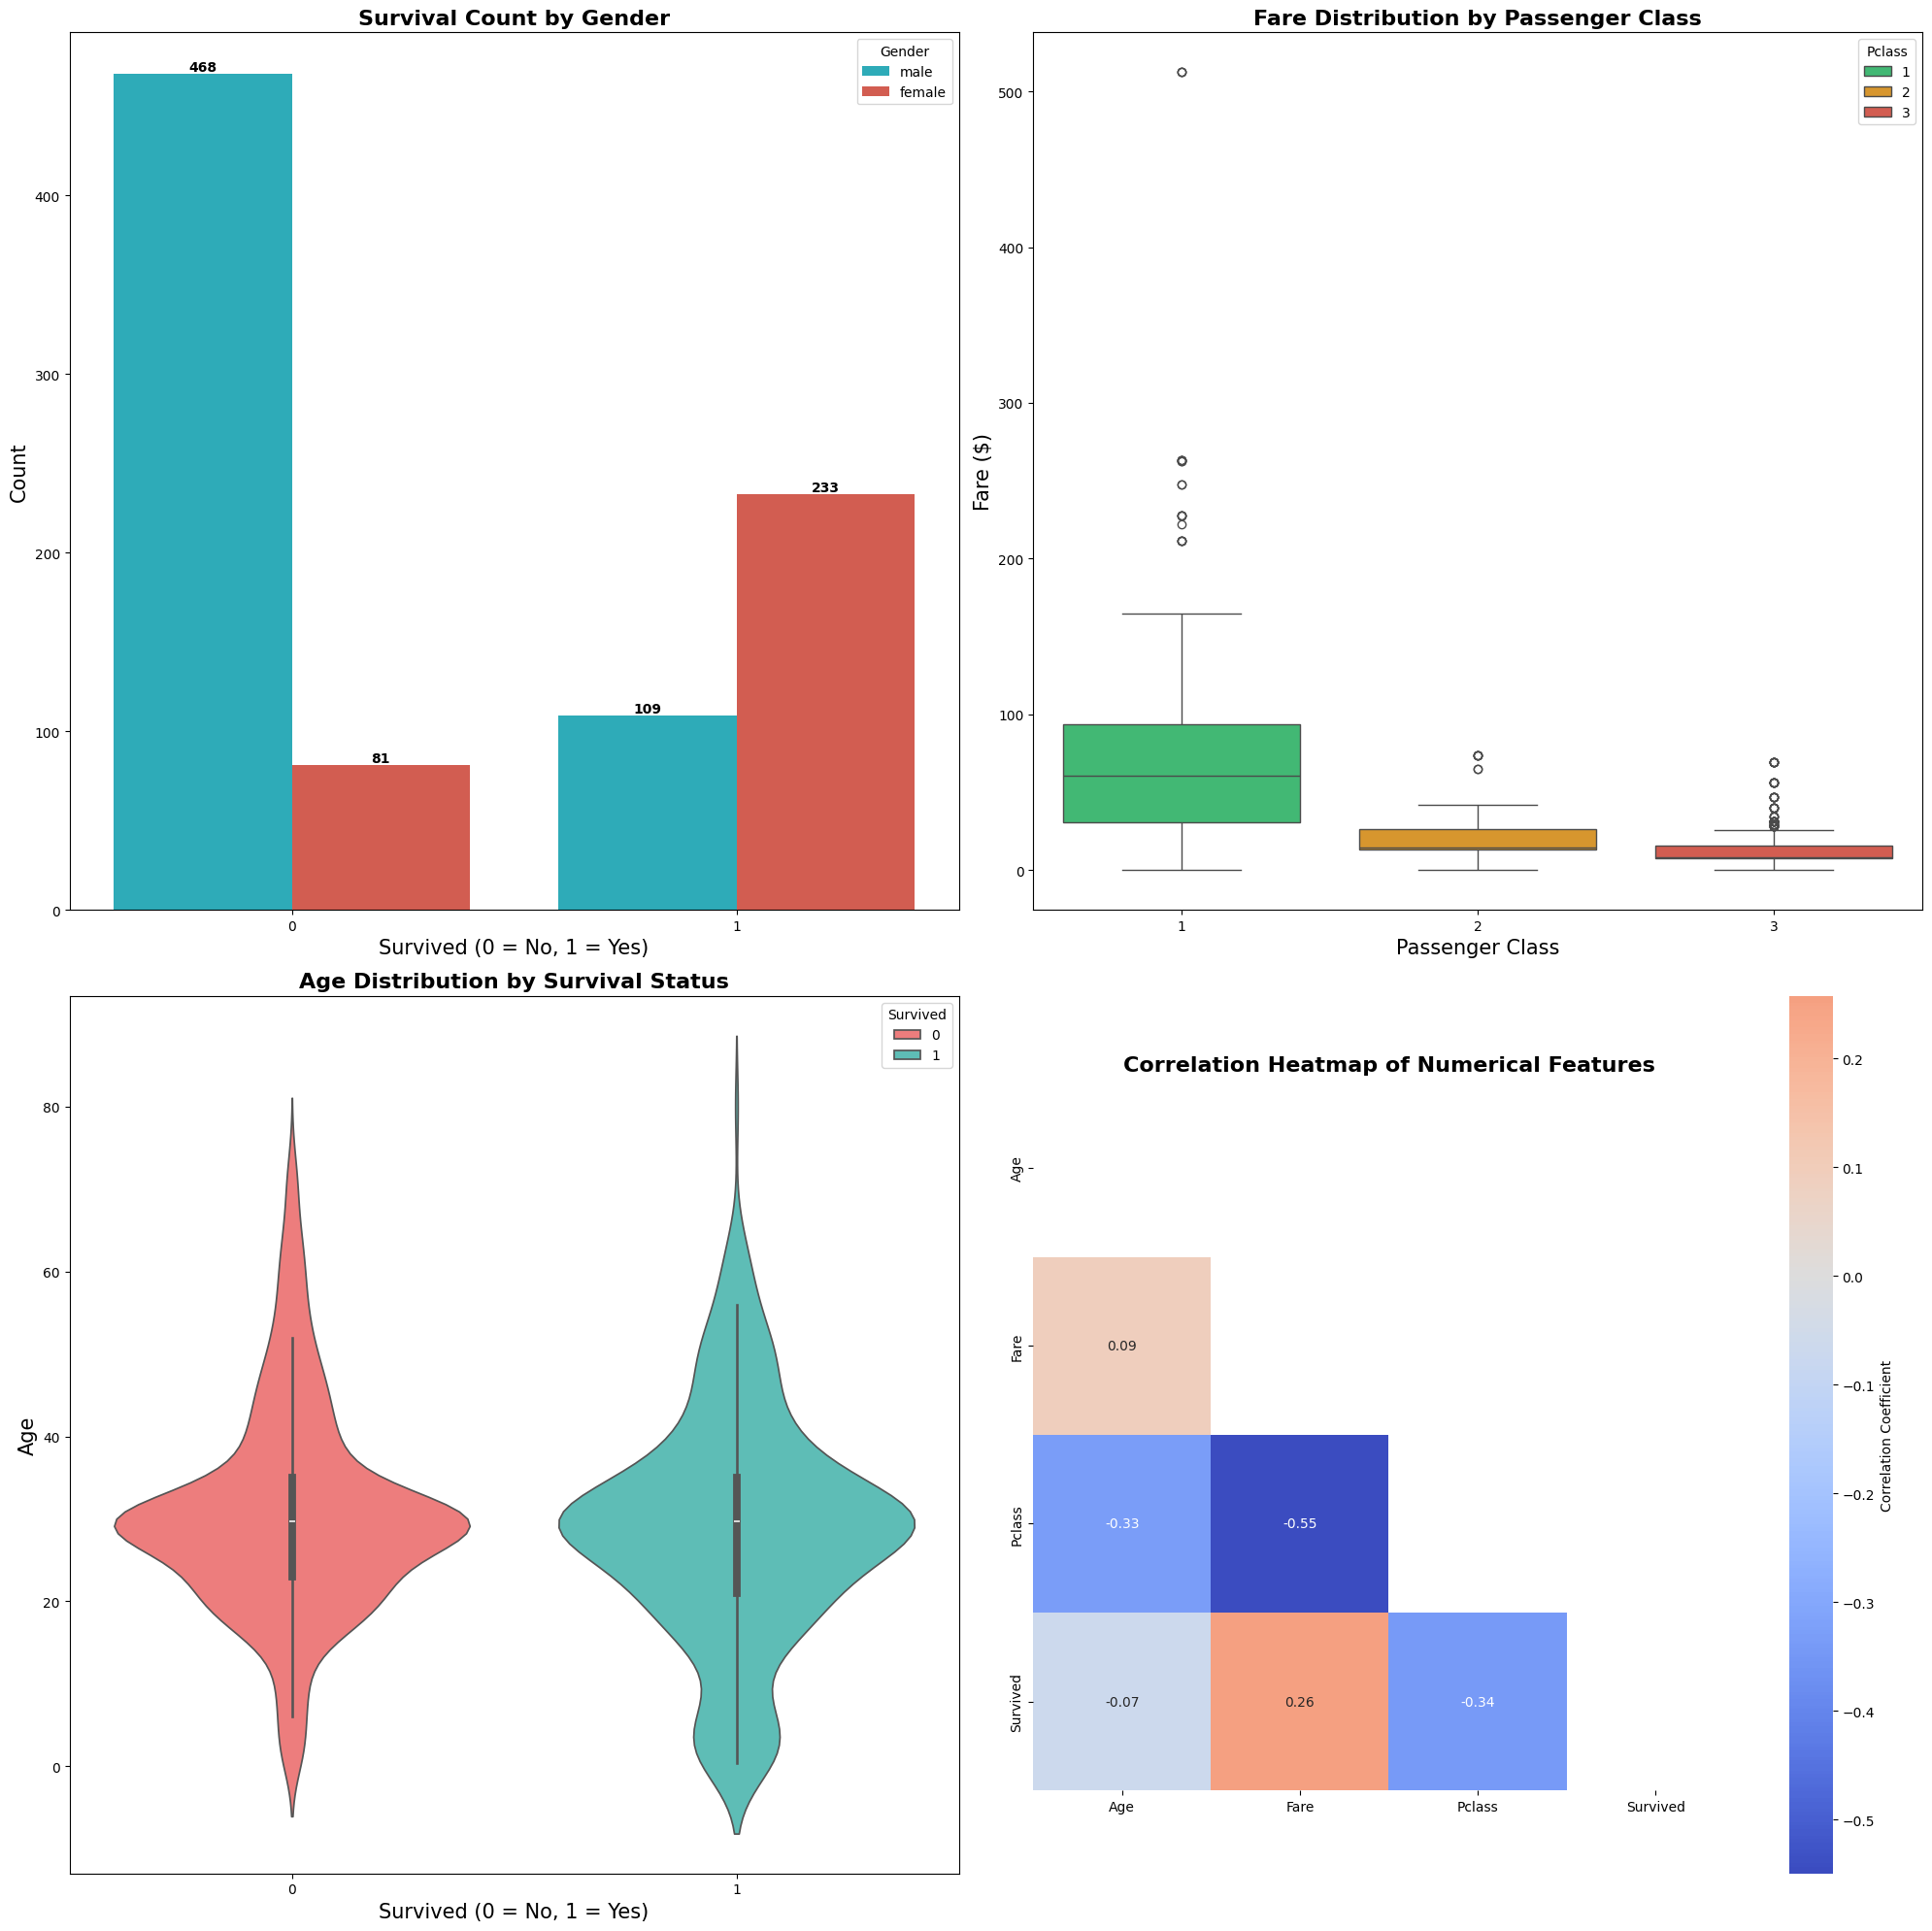

In [14]:

plt.figure(figsize=(20, 20))

# 1. Countplot: Survived by Sex
plt.subplot(2, 2, 1)
ax1 = sns.countplot(data=df, x='Survived', hue='Sex', palette=['#17becf', '#e74c3c'])
plt.title('Survival Count by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Gender')

# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fontweight='bold')
    

# 2. Boxplot: Fare by Pclass
plt.subplot(2, 2, 2)
ax2 = sns.boxplot(data=df, x='Pclass', y='Fare', hue='Pclass',  palette=['#2ecc71', '#f39c12', '#e74c3c'])
plt.title('Fare Distribution by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=15)
plt.ylabel('Fare ($)', fontsize=15)


# 3. Violinplot: Age by Survived
plt.subplot(2, 2, 3)
ax3 = sns.violinplot(data=df, x='Survived', y='Age', hue='Survived', palette=['#ff6b6b', '#4ecdc4'])
plt.title('Age Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=15)
plt.ylabel('Age', fontsize=15)


# 4. Heatmap: Correlation between numerical columns
plt.subplot(2, 2, 4)
# Select numerical columns and calculate correlation
numerical_cols = ['Age', 'Fare', 'Pclass', 'Survived']
correlation_data = df[numerical_cols].corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_data, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'},
            mask=mask)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()

plt.savefig('age_and_gender_survival_rate.png', dpi=300, bbox_inches='tight')
plt.show()


# Part D – Probability Concepts

1. Empirical Probability
   
## Examples:
- Probability a passenger survived:
   - P(Survived) = Survivors / Total Passengers
- Probability a female survived:
   - P({Female Survived}) = Surviving Females / Total Females
- Probability a male survived:
   - P({Male Survived}) = Surviving Males / Total Males
- Compare probabilities across Pclass.

In [15]:

# Total passengers
total_passengers = len(df)

# 1. Probability a passenger survived
survivors = df['Survived'].sum()
p_survived = survivors / total_passengers

print("Empirical Probabilities from Titanic Dataset:")
print("=" * 50)
print(f"1. P(Survived Passengers) = {survivors} / {total_passengers} = {p_survived:.3f} ({p_survived*100:.1f}%)")

# 2. Probability a female survived
females = df[df['Sex'] == 'female']
surviving_females = females['Survived'].sum()
p_female_survived = surviving_females / len(females) # Total females

print(f"\n2. P(Female Survived) = {surviving_females} / {len(females)} = {p_female_survived:.3f} ({p_female_survived*100:.1f}%)")

# 3. Probability a male survived
males = df[df['Sex'] == 'male']
surviving_males = males['Survived'].sum()
p_male_survived = surviving_males / len(males) # Total males

print(f"\n3. P(Male Survived) = {surviving_males} / {len(males)} = {p_male_survived:.3f} ({p_male_survived*100:.1f}%)")

# 4. Compare probabilities across Pclass
print(f"\n4. Survival Probabilities by Passenger Class:")
print("-" * 40)

for pclass in sorted(df['Pclass'].unique()):
    class_data = df[df['Pclass'] == pclass]
    class_survivors = class_data['Survived'].sum()
    total_class = len(class_data)
    p_class_survived = class_survivors / total_class
    
    print(f"   P(Survived | Class {pclass}) = {class_survivors:3d} / {total_class:3d} = {p_class_survived:.3f} ({p_class_survived*100:5.1f}%)")



Empirical Probabilities from Titanic Dataset:
1. P(Survived Passengers) = 342 / 891 = 0.384 (38.4%)

2. P(Female Survived) = 233 / 314 = 0.742 (74.2%)

3. P(Male Survived) = 109 / 577 = 0.189 (18.9%)

4. Survival Probabilities by Passenger Class:
----------------------------------------
   P(Survived | Class 1) = 136 / 216 = 0.630 ( 63.0%)
   P(Survived | Class 2) =  87 / 184 = 0.473 ( 47.3%)
   P(Survived | Class 3) = 119 / 491 = 0.242 ( 24.2%)


# Part E – Insights & Reporting
## In Word File